In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df=df.drop(['RowNumber','Surname','CustomerId'],axis=1)

In [5]:
df=df.dropna()

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
##normalize

In [8]:
states=pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [9]:

df=df.drop(['Geography','Gender'],axis=1)
df=pd.concat([df,states,gender],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [10]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df['Exited']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [16]:
classi=Sequential()

In [17]:
classi.add(Dense(6,activation="relu"))
classi.add(Dropout(rate=0.1))

In [18]:
classi.add(Dense(6,activation="relu"))
classi.add(Dropout(rate=0.1))

In [19]:
classi.add(Dense(1,activation="sigmoid"))


In [20]:
classi.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [21]:
classi.fit(X_train,y_train,batch_size=10,epochs=5)

Epoch 1/50
750/750 [==============================] - 3s 2ms/step - loss: 0.5373 - accuracy: 0.7969
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4827 - accuracy: 0.7969
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4652 - accuracy: 0.7969
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4570 - accuracy: 0.7969
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4515 - accuracy: 0.7969
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4480 - accuracy: 0.7969
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4457 - accuracy: 0.7969
Epoch 8/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4426 - accuracy: 0.7969
Epoch 9/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4413 - accuracy: 0.7969
Epoch 10/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4409 - accuracy: 0.7969

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_pred=classi.predict(X_test)
y_pred=(y_pred>0.5)

79/79 [==============================] - 0s 2ms/step


In [24]:
cm=confusion_matrix(y_pred,y_test)

Text(95.72222222222221, 0.5, 'Truth')

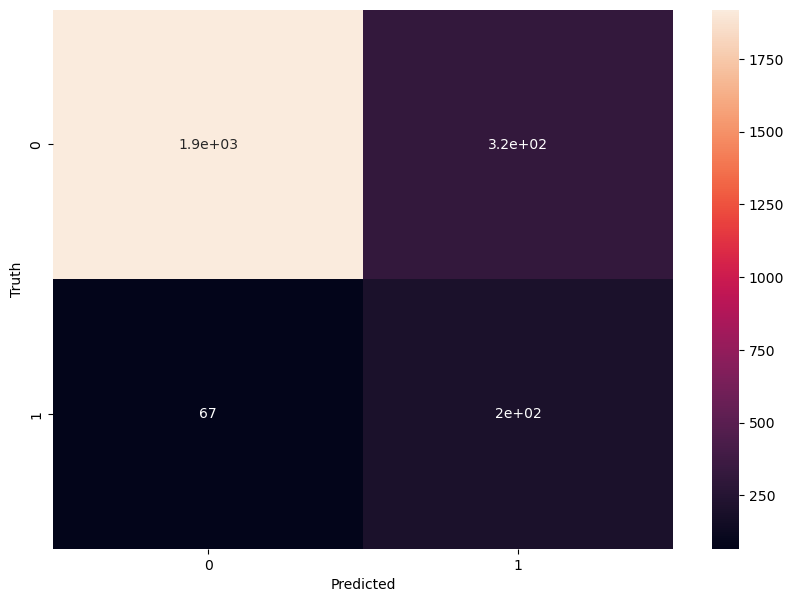

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')